In [7]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE


# evalue measures
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

print('Completed.')

Completed.


In [8]:
df = pd.read_csv('data/DepressionRate.csv')

In [9]:
df.head()

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?","2. In a semester, how often have you been unable to stop worrying about your academic affairs?","3. In a semester, how often have you had trouble relaxing due to academic pressure?",...,"2. In a semester, how often have you been feeling down, depressed or hopeless?","3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?","4. In a semester, how often have you been feeling tired or having little energy?","5. In a semester, how often have you had poor appetite or overeating?","6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?","7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?","8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?","9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?",Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression


In [10]:
# Renomeando as colunas para algo mais simples
df_renamed = df.rename(columns={
    '1. Age': 'Age',
    '2. Gender': 'Gender',
    '3. University': 'University',
    '4. Department': 'Department',
    '5. Academic Year': 'Academic_Year',
    '6. Current CGPA': 'Current_CGPA',
    '7. Did you receive a waiver or scholarship at your university?': 'Scholarship',
    '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ': 'Anxious_Often',
    '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ': 'Worry_Often',
    '3. In a semester, how often have you had trouble relaxing due to academic pressure? ': 'Relax_Trouble',
    '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?': 'Irritated_Often',
    '5. In a semester, how often have you worried too much about academic affairs? ': 'Worry_Too_Much',
    '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?': 'Restless_Often',
    '7. In a semester, how often have you felt afraid, as if something awful might happen?': 'Fearful_Often',
    'Anxiety Value': 'Anxiety_Value',
    'Anxiety Label': 'Anxiety_Label',
    '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ': 'Upset_Often',
    '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?': 'Control_Loss',
    '3. In a semester, how often you felt nervous and stressed because of academic pressure? ': 'Stress_Often',
    '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ': 'Cope_Difficulty',
    '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?': 'Confident_Handle',
    '6. In a semester, how often you felt as if things in your academic life is going on your way? ': 'Things_Going_Well',
    '7. In a semester, how often are you able to control irritations in your academic / university affairs? ': 'Control_Irritation',
    '8. In a semester, how often you felt as if your academic performance was on top?': 'Top_Performance_Feel',
    '9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control? ': 'Angered_By_Grades',
    '10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them? ': 'Difficulties_Piling_Up',
    'Stress Value': 'Stress_Value',
    'Stress Label': 'Stress_Label',
    '1. In a semester, how often have you had little interest or pleasure in doing things?': 'Little_Interest',
    '2. In a semester, how often have you been feeling down, depressed or hopeless?': 'Feeling_Down',
    '3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much? ': 'Sleep_Trouble',
    '4. In a semester, how often have you been feeling tired or having little energy? ': 'Low_Energy',
    '5. In a semester, how often have you had poor appetite or overeating? ': 'Appetite_Problems',
    '6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down? ': 'Feeling_Failure',
    '7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television? ': 'Concentration_Trouble',
    '8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you\'ve been moving a lot more than usual because you\'ve been restless? ': 'Movement_Trouble',
    '9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself? ': 'Self_Harm_Thoughts',
    'Depression Value': 'Depression_Value',
    'Depression Label': 'Depression_Label'
})

# Exibindo os novos nomes das colunas
df_renamed.columns

Index(['Age', 'Gender', 'University', 'Department', 'Academic_Year',
       'Current_CGPA', 'Scholarship', 'Anxious_Often', 'Worry_Often',
       'Relax_Trouble', 'Irritated_Often', 'Worry_Too_Much', 'Restless_Often',
       'Fearful_Often', 'Anxiety_Value', 'Anxiety_Label', 'Upset_Often',
       'Control_Loss', 'Stress_Often', 'Cope_Difficulty', 'Confident_Handle',
       'Things_Going_Well', 'Control_Irritation', 'Top_Performance_Feel',
       'Angered_By_Grades', 'Difficulties_Piling_Up', 'Stress_Value',
       'Stress_Label', 'Little_Interest', 'Feeling_Down', 'Sleep_Trouble',
       'Low_Energy', 'Appetite_Problems', 'Feeling_Failure',
       'Concentration_Trouble', 'Movement_Trouble', 'Self_Harm_Thoughts',
       'Depression_Value', 'Depression_Label'],
      dtype='object')

In [11]:
#Nao tem valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 39 columns):
 #   Column                                                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                                                 --------------  ----- 
 0   1. Age                                                                                                                                                                 1977 non-null   object
 1   2. Gender                                                                                                                                                              1977 non-null   object
 2   3. University                                                                                               

In [12]:
# Selecionando as colunas para manter sem tratamento
untreated_columns = ['Depression_Label']

# Separando as colunas que não devem ser tratadas
df_untreated = df_renamed[untreated_columns]

# Separando as colunas que devem ser tratadas
df_to_encode = df_renamed.drop(columns=untreated_columns)

# Codificando variáveis categóricas usando one-hot encoding nas colunas que precisam ser tratadas
df_encoded = pd.get_dummies(df_to_encode, drop_first=True)

# Combinando as colunas tratadas e não tratadas
df_final = pd.concat([df_encoded, df_untreated], axis=1)

# Exibindo as primeiras linhas do DataFrame final
df_final.head()

,Anxious_Often,Worry_Often,Relax_Trouble,Irritated_Often,Worry_Too_Much,Restless_Often,Fearful_Often,Anxiety_Value,Upset_Often,Control_Loss,...,Current_CGPA_3.80 - 4.00,Current_CGPA_Below 2.50,Current_CGPA_Other,Scholarship_Yes,Anxiety_Label_Minimal Anxiety,Anxiety_Label_Moderate Anxiety,Anxiety_Label_Severe Anxiety,Stress_Label_Low Stress,Stress_Label_Moderate Stress,Depression_Label
0,1,1,1,2,2,2,1,10,2,2,...,False,False,False,False,False,True,False,False,True,Moderate Depression
1,2,2,1,1,1,1,1,9,2,2,...,True,False,False,False,False,False,False,False,True,Mild Depression
2,2,1,1,0,2,2,2,10,3,2,...,False,False,False,False,False,True,False,False,True,Moderately Severe Depression
3,2,1,1,1,1,1,1,8,2,2,...,False,False,False,False,False,False,False,False,True,Mild Depression
4,1,1,1,1,1,1,1,7,2,2,...,False,False,False,False,False,False,False,False,True,Mild Depression


In [21]:
df_final['Depression_Label'].value_counts()

Depression_Label
Moderately Severe Depression    495
Severe Depression               488
Moderate Depression             449
Mild Depression                 408
Minimal Depression               93
No Depression                    44
Name: count, dtype: int64

In [24]:
df_final['Depression_Label'].replace({'No Depression': 0, 'Minimal Depression': 1,
                                       'Mild Depression': 2, 'Moderate Depression': 3,
                                         'Moderately Severe Depression': 4, 'Severe Depression': 5}, inplace=True)

In [30]:
#Fazendo um heatmap para ver quais categorias tem uma maior relação com a variável target (Sinalizando a o diagnóstico de doenças cardíacas)
fig = px.imshow(df_final.corr())

#Mudar o layout do heatmap 
fig.update_layout(title="Heatmap de Doenças Cardíacas",xaxis=dict(tickangle=-45),)

fig.show()


In [25]:
X = df_final.drop('Depression_Label', axis=1)
y = df_final['Depression_Label']

In [26]:
#Realziando a separação dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('---')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (1581, 75)
y_train:  (1581,)
---
X_test:  (396, 75)
y_test:  (396,)


In [27]:
#Definindo modelo de Regressão Linear
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

In [35]:
y_test == y_pred

914      True
615      True
1772     True
1328     True
361     False
        ...  
350     False
588      True
343      True
1645     True
915      True
Name: Depression_Label, Length: 396, dtype: bool

In [42]:
y_pred

array([5, 5, 5, 3, 2, 5, 2, 5, 1, 0, 5, 4, 5, 4, 3, 5, 2, 4, 5, 4, 5, 4,
       2, 2, 3, 3, 4, 3, 5, 3, 4, 4, 4, 2, 5, 5, 3, 5, 4, 4, 4, 4, 5, 4,
       5, 5, 3, 4, 3, 5, 2, 3, 4, 1, 3, 4, 5, 4, 3, 4, 5, 4, 1, 4, 4, 2,
       5, 4, 3, 5, 4, 4, 4, 3, 3, 3, 3, 5, 3, 5, 5, 4, 3, 3, 2, 2, 1, 4,
       3, 0, 5, 3, 2, 5, 3, 3, 5, 2, 1, 4, 5, 4, 2, 3, 1, 5, 3, 5, 5, 2,
       5, 3, 5, 2, 1, 2, 3, 3, 3, 3, 4, 3, 4, 4, 5, 3, 4, 1, 2, 1, 3, 4,
       2, 4, 3, 4, 5, 5, 4, 2, 3, 4, 5, 5, 3, 5, 4, 2, 1, 4, 3, 4, 0, 3,
       5, 2, 5, 3, 5, 4, 2, 2, 4, 4, 4, 3, 2, 2, 3, 5, 5, 2, 4, 3, 5, 0,
       4, 5, 5, 4, 4, 3, 4, 2, 5, 2, 5, 3, 5, 5, 4, 2, 5, 2, 4, 3, 5, 2,
       4, 3, 5, 5, 3, 1, 2, 5, 4, 4, 5, 4, 3, 2, 2, 4, 3, 4, 2, 3, 5, 4,
       5, 3, 2, 3, 4, 3, 3, 5, 3, 1, 5, 5, 2, 3, 2, 2, 3, 4, 3, 5, 2, 2,
       2, 2, 5, 3, 4, 5, 4, 4, 4, 5, 4, 4, 5, 3, 5, 5, 4, 5, 2, 3, 4, 3,
       5, 2, 4, 4, 0, 5, 5, 4, 3, 2, 3, 2, 2, 5, 5, 2, 0, 2, 2, 5, 5, 5,
       2, 3, 5, 3, 2, 4, 3, 4, 3, 4, 3, 3, 2, 5, 3,

In [43]:
y_test

914     5
615     5
1772    5
1328    3
361     3
       ..
350     2
588     4
343     3
1645    4
915     4
Name: Depression_Label, Length: 396, dtype: int64

In [39]:
# Supondo que você tenha y_test como os valores reais
 # Calcula a média dos valores reais

# Calcula a Soma dos Quadrados Totais (SST)
print(y_test, y_pred, y_test == y_pred)
SST = np.sum((y_test - y_pred) ** 2)

print("Soma dos Quadrados Totais (SST):", SST)

y  914     5
615     5
1772    5
1328    3
361     3
       ..
350     2
588     4
343     3
1645    4
915     4
Name: Depression_Label, Length: 396, dtype: int64 [5 5 5 3 2 5 2 5 1 0 5 4 5 4 3 5 2 4 5 4 5 4 2 2 3 3 4 3 5 3 4 4 4 2 5 5 3
 5 4 4 4 4 5 4 5 5 3 4 3 5 2 3 4 1 3 4 5 4 3 4 5 4 1 4 4 2 5 4 3 5 4 4 4 3
 3 3 3 5 3 5 5 4 3 3 2 2 1 4 3 0 5 3 2 5 3 3 5 2 1 4 5 4 2 3 1 5 3 5 5 2 5
 3 5 2 1 2 3 3 3 3 4 3 4 4 5 3 4 1 2 1 3 4 2 4 3 4 5 5 4 2 3 4 5 5 3 5 4 2
 1 4 3 4 0 3 5 2 5 3 5 4 2 2 4 4 4 3 2 2 3 5 5 2 4 3 5 0 4 5 5 4 4 3 4 2 5
 2 5 3 5 5 4 2 5 2 4 3 5 2 4 3 5 5 3 1 2 5 4 4 5 4 3 2 2 4 3 4 2 3 5 4 5 3
 2 3 4 3 3 5 3 1 5 5 2 3 2 2 3 4 3 5 2 2 2 2 5 3 4 5 4 4 4 5 4 4 5 3 5 5 4
 5 2 3 4 3 5 2 4 4 0 5 5 4 3 2 3 2 2 5 5 2 0 2 2 5 5 5 2 3 5 3 2 4 3 4 3 4
 3 3 2 5 3 3 5 5 2 4 4 4 3 4 5 3 3 4 5 3 1 3 3 0 2 5 5 4 3 4 5 4 4 3 5 5 3
 2 2 2 5 3 4 4 5 2 4 5 3 3 5 4 5 4 2 3 3 4 3 3 2 1 5 4 3 2 4 3 4 2 3 1 2 3
 5 5 4 5 5 4 4 5 0 2 5 2 5 2 2 1 0 0 3 2 3 3 4 3 4 4] 914      True
615      True
1772 

In [29]:
r2 = r2_score(y_test, y_pred)

r2

(0.20959595959595959, 0.8698374353998772)

In [44]:
#Matriz de confusão
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 8,  0,  0,  0,  0,  0],
       [ 2, 15,  1,  0,  0,  0],
       [ 0,  1, 55, 10,  0,  0],
       [ 0,  0, 14, 77, 14,  0],
       [ 0,  0,  0, 10, 71, 16],
       [ 0,  0,  0,  0, 15, 87]])

<Axes: >

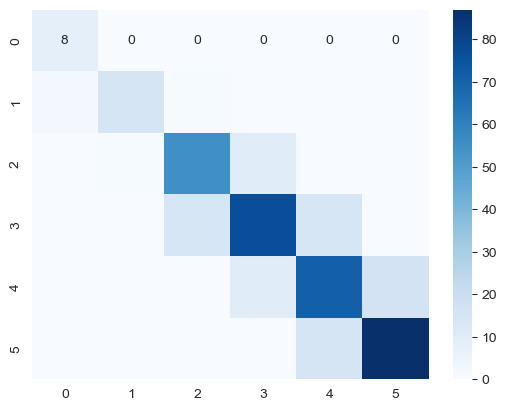

In [45]:
sns.heatmap(confusion_matrix, cmap= "Blues", annot=True)